In [2]:
%matplotlib inline
from preamble import *

# Working with Text Data

### Types of data represented as strings
#### Example application: Sentiment analysis of movie reviews

In [2]:
!tree -L 2 data/aclImdb

data/aclImdb
├── test
│   ├── neg
│   └── pos
└── train
    ├── neg
    └── pos

6 directories, 0 files


In [1]:
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")
# load_files returns a bunch, containing training texts and training labels
text_train, y_train = reviews_train.data, reviews_train.target
print("type of text_train: ", type(text_train))
print("length of text_train: ", len(text_train))
print("text_train[1]:")
print(text_train[1])

type of text_train:  <class 'list'>
length of text_train:  25000
text_train[1]:
b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decis

In [3]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [4]:
print(np.bincount(y_train))

[12500 12500]


In [5]:
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: %d" % len(text_test))
print(np.bincount(y_test))

Number of documents in test data: 25000
[12500 12500]


In [6]:
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

### Representing text data as Bag of Words

In [8]:
# Fixme illustration

#### Applying bag-of-words to a toy dataset

In [9]:
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

NameError: name 'bards_words' is not defined

In [11]:
print(len(vect.vocabulary_))
print("vocabulary content:")
vect.vocabulary_

13
vocabulary content:


{'be': 0,
 'but': 1,
 'doth': 2,
 'fool': 3,
 'he': 4,
 'himself': 5,
 'is': 6,
 'knows': 7,
 'man': 8,
 'the': 9,
 'think': 10,
 'to': 11,
 'wise': 12}

In [12]:
bag_of_words = vect.transform(bards_words)
bag_of_words

<2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [13]:
print(bag_of_words.toarray())

[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


### Bag-of-word for movie reviews

In [14]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print(repr(X_train))

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [15]:
feature_names = vect.get_feature_names()
print(len(feature_names))
# print first fifty features
print(feature_names[:20])
# print feature 20010 to 20030
print(feature_names[20010:20030])
# get every 2000th word to get an overview
print(feature_names[::2000])

74849
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
np.mean(scores)

0.88131999999999999

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [18]:
grid.best_score_

0.88815999999999995

In [19]:
grid.best_params_

{'C': 0.1}

In [20]:
X_test = vect.transform(text_test)
grid.score(X_test, y_test)

0.87895999999999996

In [21]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print(repr(X_train))

<25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [22]:
feature_names = vect.get_feature_names()

# print first fifty features
print(feature_names[:50])
# print feature 20010 to 20020
print(feature_names[20010:20030])
#
print(feature_names[::700])

['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciation', 'recipient', 'reviews', 'sas', 'shea', 'sneers', 'steiger', 

In [23]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_score_

0.88812000000000002

In [24]:
grid.best_score_

0.88812000000000002

### Stop-words

In [25]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# print number of stop words
print(len(ENGLISH_STOP_WORDS))
# print some of the stop words
print(list(ENGLISH_STOP_WORDS)[::10])

318
['whenever', 'thereupon', 'every', 'often', 'always', 'his', 'amoungst', 'was', 'neither', 'itself', 'it', 'them', 'top', 'less', 'are', 'through', 'wherein', 'etc', 'go', 'within', 'mostly', 'fill', 'of', 'myself', 'out', 'up', 'thereafter', 'am', 'because', 'ltd', 'therefore', 'could']


In [26]:
# specifying "english" uses the build-in list. We could also augment it and pass our own.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print(repr(X_train))

<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [27]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_score_

0.88295999999999997

## Rescaling the data with TFIDF

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
grid.best_score_

0.89188000000000001

In [29]:
grid.best_score_

0.89188000000000001

In [30]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset:
X_train = vectorizer.transform(text_train)
# find maximum value for each of the features over dataset:
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())

print("features with lowest tfidf")
print(feature_names[sorted_by_tfidf[:20]])

print("features with highest tfidf")
print(feature_names[sorted_by_tfidf[-20:]])

features with lowest tfidf
['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
features with highest tfidf
['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [31]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("features with lowest idf")
# FIXME plot?
print(feature_names[sorted_by_idf[:100]])

features with lowest idf
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


### Investigating model coefficients

In [32]:
# FIXME move to helper functions
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features), feature_names[interesting_coefficients], rotation=60, ha="right");

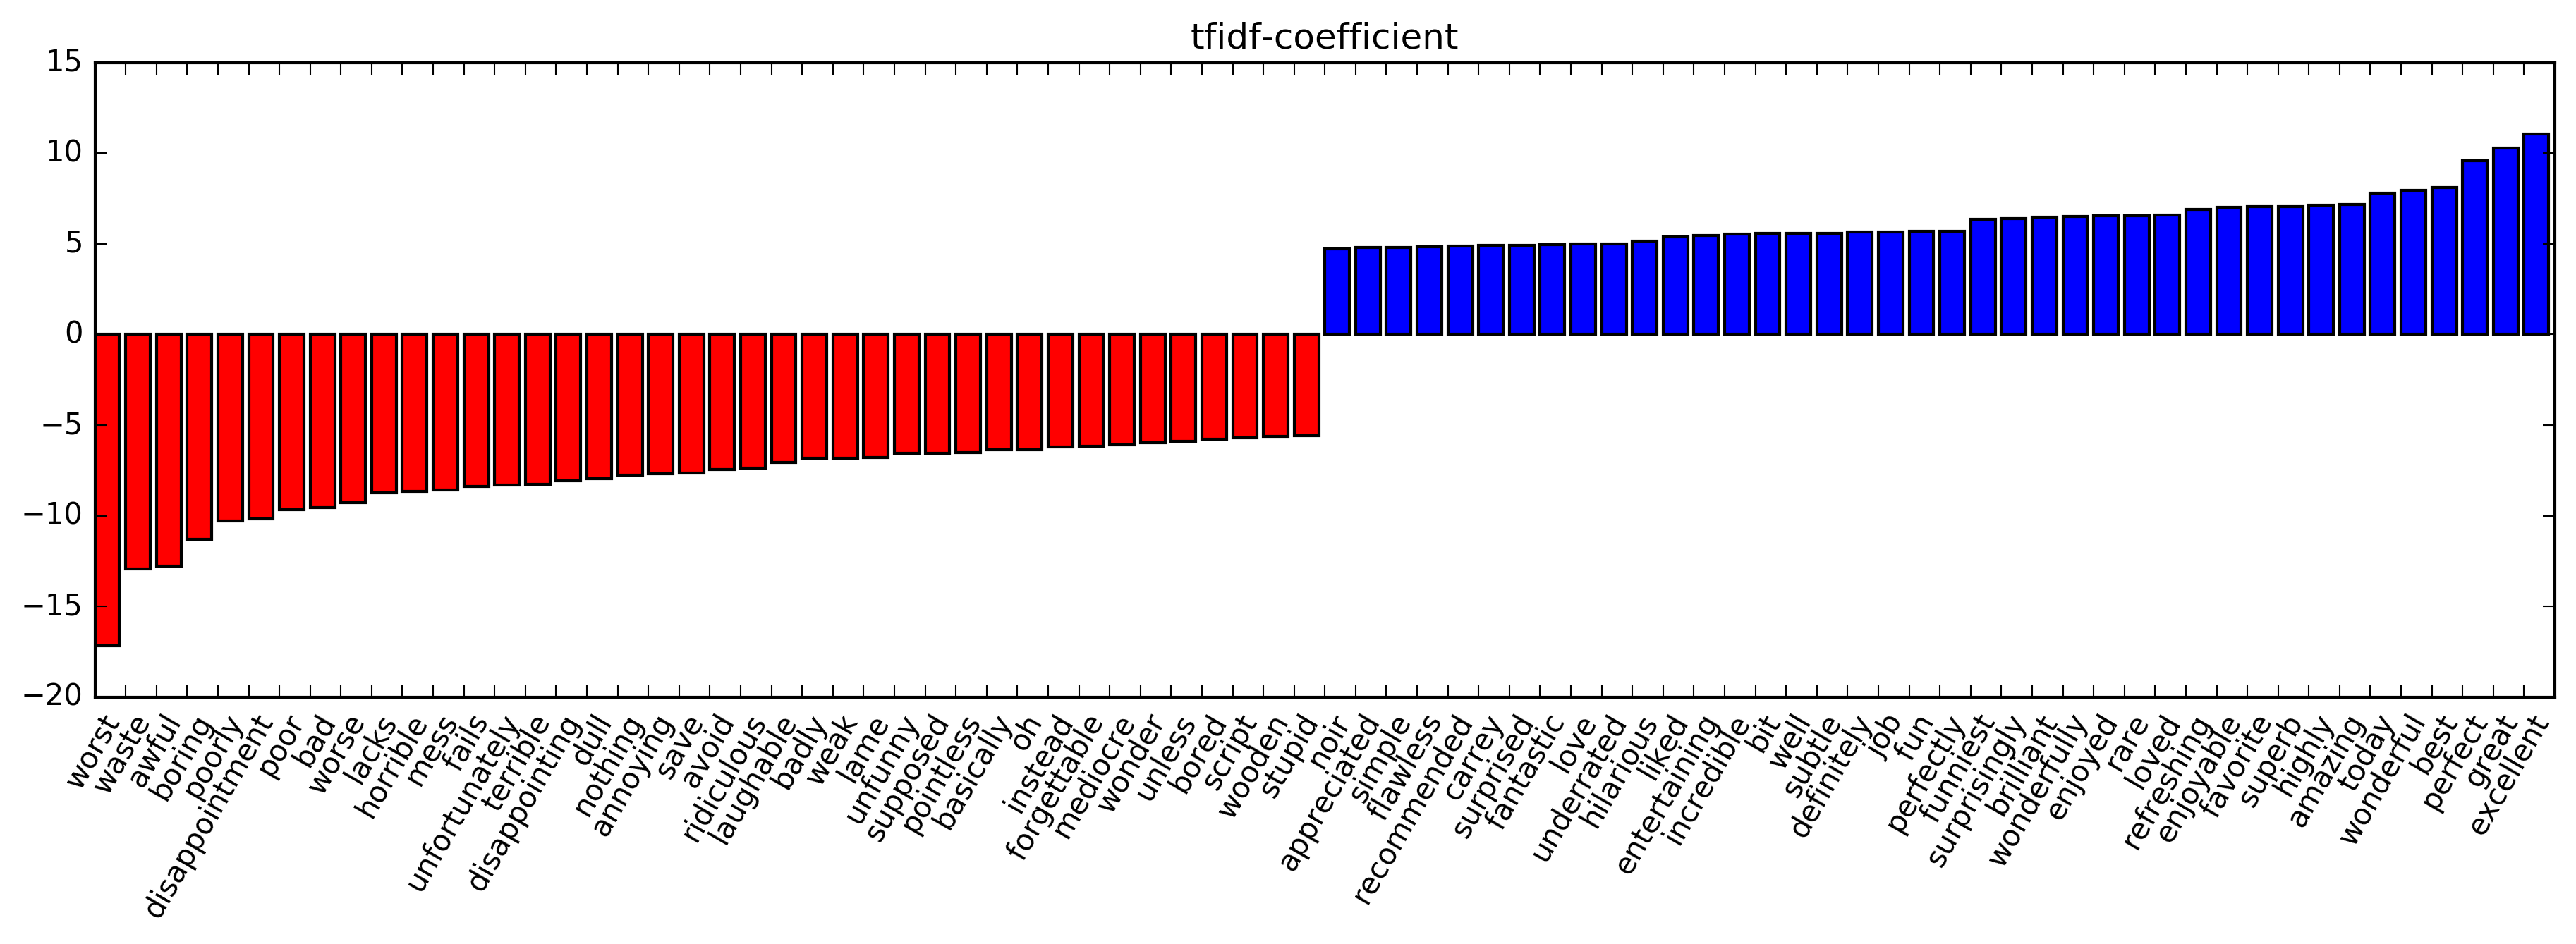

In [33]:
visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"], feature_names, n_top_features=40)
plt.title("tfidf-coefficient")

In [34]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
lr = LogisticRegression(C=0.1).fit(X_train, y_train)

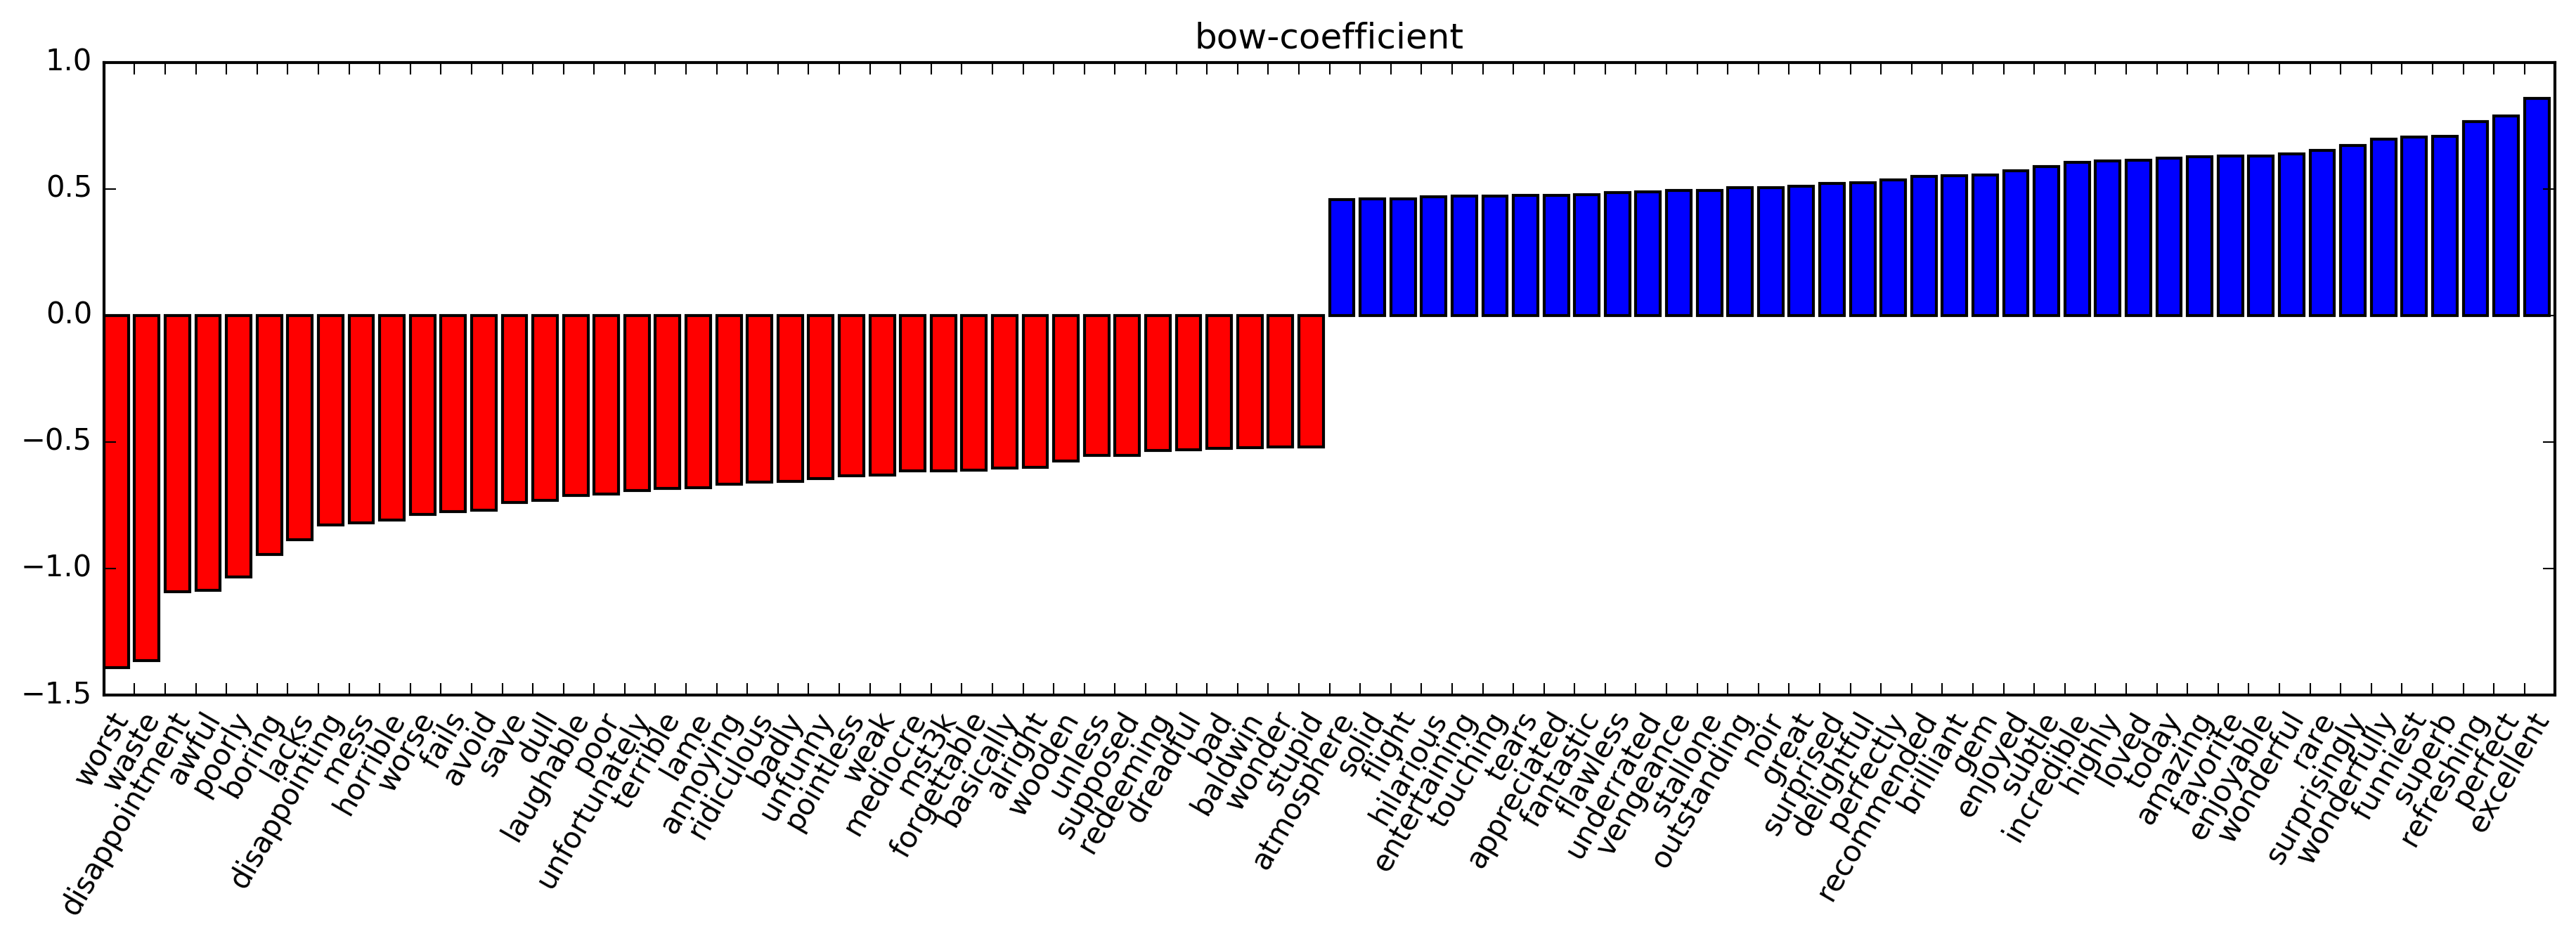

In [35]:
visualize_coefficients(lr, vect.get_feature_names(), n_top_features=40)
plt.title("bow-coefficient")

In [36]:
#from spacy import English
#nlp = English()

### Bag of words with more than one word (n-grams)

In [37]:
print(bards_words)

['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [38]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print(len(cv.vocabulary_))
print(cv.get_feature_names())

13
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [39]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print(len(cv.vocabulary_))
print(cv.get_feature_names())

14
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [40]:
cv.transform(bards_words).toarray()

array([[0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]])

In [41]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print(len(cv.vocabulary_))
print(cv.get_feature_names())

39
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


# FIXME add 3-grams below!

In [42]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
grid.best_score_

0.90503999999999996

In [43]:
pipe = make_pipeline(CountVectorizer(min_df=5), LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
              "countvectorizer__ngram_range": [(1, 1), (1, 2)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
grid.best_score_

0.89636000000000005

In [44]:
grid.best_params_

{'countvectorizer__ngram_range': (1, 2), 'logisticregression__C': 0.1}

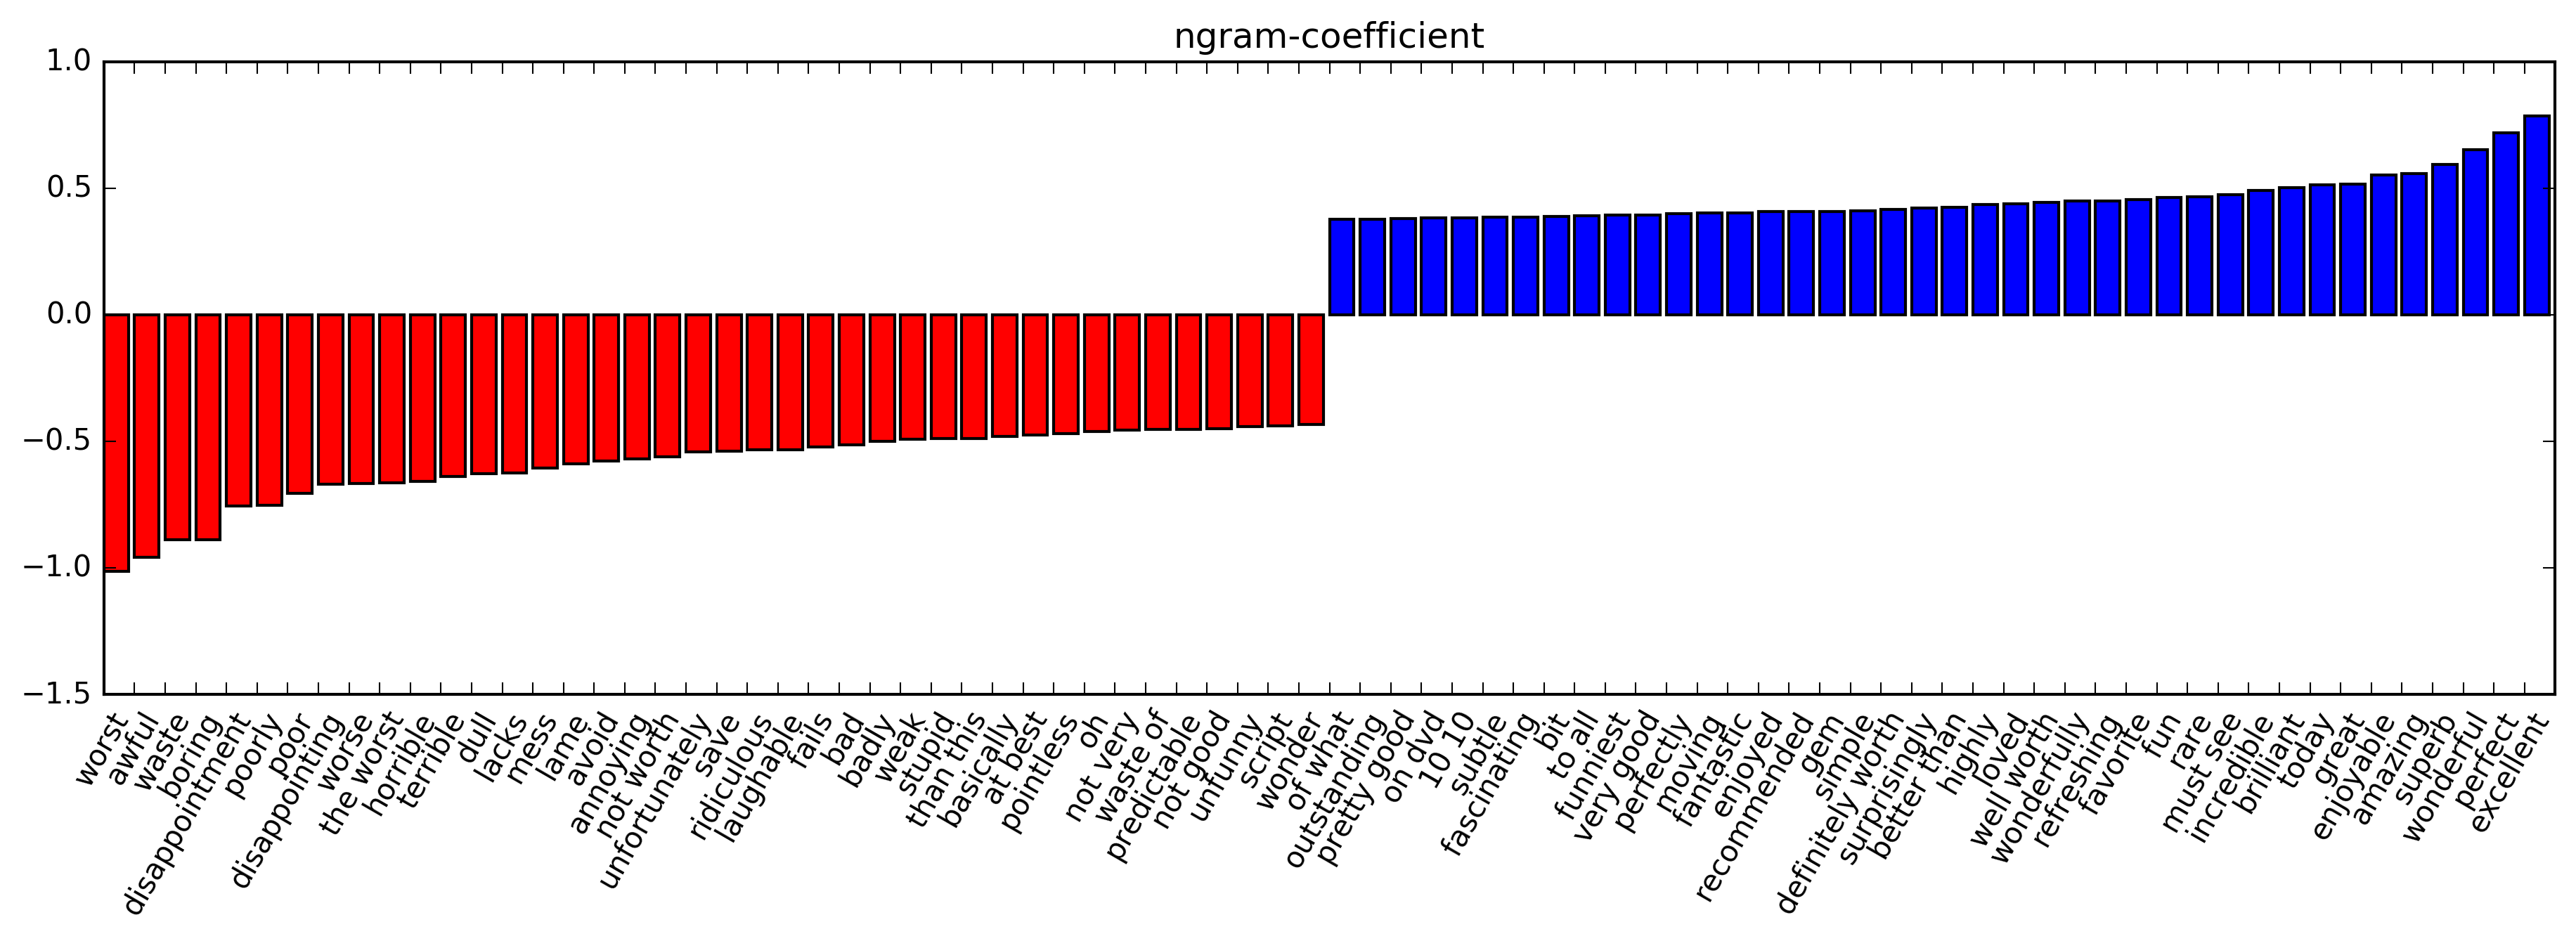

In [45]:
visualize_coefficients(grid.best_estimator_.named_steps['logisticregression'], grid.best_estimator_.named_steps['countvectorizer'].get_feature_names(), n_top_features=40)
plt.title("ngram-coefficient")

### Advanced tokenization, stemming and lemmatization

In [46]:
import spacy
import nltk

# load spacy's English language models
en_nlp = spacy.load('en')
# instantiate NLTK's Porter stemmer
stemmer = nltk.stem.PorterStemmer()

# define function to compare lemmatization in spacy with stemming in NLKT
def compare_normalization(doc):
    # tokenize document in spacy:
    doc_spacy = en_nlp(doc)
    # print lemmas found by spacy
    print("Lemmatization:")
    print([token.lemma_ for token in doc_spacy])
    # print tokens found by Porter stemmer
    print("Stemming:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [47]:
compare_normalization("Our meeting today was worse than yesterday, I'm scared of meeting the clients tomorrow")

Lemmatization:
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'i', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow']
Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', "'m", 'scare', 'of', 'meet', 'the', 'client', 'tomorrow']


In [48]:
# FIXME simplify this!!!
import re
regexp = re.compile('(?u)\\b\\w\\w+\\b')

def replace_tokenizer(nlp):
    old_tokenizer = nlp.tokenizer 
    nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(regexp.findall(string))
    return nlp

en_nlp_ = spacy.load('en')    
en_nlp = replace_tokenizer(en_nlp_)


In [49]:
def custom_tokenizer(document):
    doc_spacy = en_nlp(document, entity=False, parse=False)
    return [token.lemma_ for token in doc_spacy]


# define a count vectorizer with the custom tokenizer
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

In [50]:
X_train = lemma_vect.fit_transform(text_train)

In [51]:
from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=StratifiedShuffleSplit(n_iter=5, test_size=0.99, train_size=0.01, random_state=0))
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.730795959596
{'C': 0.1}


In [52]:
grid.grid_scores_

[mean: 0.67056, std: 0.01615, params: {'C': 0.001},
 mean: 0.71731, std: 0.01417, params: {'C': 0.01},
 mean: 0.73080, std: 0.01133, params: {'C': 0.1},
 mean: 0.72925, std: 0.00915, params: {'C': 1},
 mean: 0.72706, std: 0.00702, params: {'C': 10}]

In [53]:
X_train_normal = CountVectorizer(min_df=5).fit_transform(text_train)

In [54]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=StratifiedShuffleSplit(n_iter=5, test_size=0.99, train_size=0.01, random_state=0))
grid.fit(X_train_normal, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.720597979798
{'C': 1}


In [55]:
grid.grid_scores_

[mean: 0.66139, std: 0.01599, params: {'C': 0.001},
 mean: 0.70453, std: 0.01449, params: {'C': 0.01},
 mean: 0.72035, std: 0.01153, params: {'C': 0.1},
 mean: 0.72060, std: 0.00916, params: {'C': 1},
 mean: 0.71893, std: 0.00793, params: {'C': 10}]

## Topic Modeling and Document Clustering
#FIXME clustering / NMF?

In [56]:
from sklearn.cluster import MiniBatchKMeans
km = MiniBatchKMeans(n_clusters=10).fit(X_train[::10])

In [57]:
km.inertia_

886647.62319716031

In [58]:
km.cluster_centers_

array([[ 0.        ,  0.        ,  0.00304878, ...,  0.00457317,
         0.        ,  0.00152439],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.06818182, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.04545455, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [59]:
km.cluster_centers_.shape

(10, 21596)

In [60]:
inds = np.argsort(km.cluster_centers_, axis=1)

In [61]:
inds.shape

(10, 21596)

In [62]:
X_train.shape

(25000, 21596)

In [63]:
np.bincount(km.predict(X_train))

/home/andy/checkout/scikit-learn/sklearn/utils/validation.py:428: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, _DataConversionWarning)


array([ 6441,     1,   421, 10679,  4178,   735,  2293,   250,     1,     1])

In [64]:
feature_names = np.array(lemma_vect.get_feature_names())
for ind in inds:
    print(feature_names[ind[-30:]])

['an' 'so' 'like' 'at' 'by' 'make' 'one' 'all' 'his' 'do' 'he' 'on' 'not'
 'you' 'for' 'with' 'but' 'as' 'movie' 'film' 'have' 'that' 'this' 'in'
 'it' 'to' 'of' 'and' 'be' 'the']
['other' 'wouldn' 'answer' 'nerve' 'way' 'experience' 'you' 'an' 'as'
 'will' 'your' 'with' 'people' 'who' 'for' 'her' 'outlook' 'and' 'them'
 'life' 'of' 'villa' 'their' 'two' 'be' 'have' 'woman' 'to' 'in' 'the']
['make' 'character' 'all' 'they' 'from' 'one' 'not' 'her' 'movie' 'at' 'on'
 'by' 'his' 'who' 'he' 'but' 'this' 'have' 'with' 'for' 'film' 'as' 'it'
 'that' 'to' 'in' 'and' 'of' 'be' 'the']
['just' 'so' 'they' 'watch' 'all' 'at' 'like' 'make' 'see' 'do' 'one' 'not'
 'on' 'with' 'as' 'for' 'but' 'film' 'you' 'have' 'that' 'movie' 'in'
 'this' 'it' 'to' 'of' 'and' 'be' 'the']
['who' 'all' 'make' 'an' 'at' 'by' 'they' 'one' 'his' 'do' 'he' 'not' 'you'
 'on' 'with' 'but' 'movie' 'as' 'for' 'film' 'have' 'that' 'this' 'it' 'in'
 'to' 'of' 'and' 'be' 'the']
['from' 'so' 'make' 'there' 'one' 'they' 'who' '

In [77]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(verbose=1)
lda.fit(X_train)

KeyboardInterrupt: 

In [66]:
lda.components_

array([[  0.10003517,   0.10002397,  22.78180661, ...,   0.10000203,
          0.10002019,   0.1       ],
       [  0.1000163 ,   0.10004605,   0.10003317, ...,   0.10000587,
          0.10000497,   0.10003489],
       [  0.10004269,   0.10004235,   0.10001914, ...,   0.10000344,
          0.10001225,   0.10002498],
       ..., 
       [ 40.4641016 ,  53.35767636,  90.18827888, ...,   0.10000974,
          0.10002877,   0.10001378],
       [  0.10001501,   5.31931776,   0.10004289, ...,   0.10000472,
          0.10000837,   0.10001814],
       [  0.10002341,   0.10003072,   8.77280989, ...,  18.35174044,
          6.70405855,   0.10001544]])

In [67]:
lda.components_.shape

(10, 21596)

In [69]:
asdf = lda.transform(X_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.8s finished


In [70]:
asdf.shape

(25000, 10)

In [71]:
asdf.sum(axis=0)

array([   200.82394171,    124.00164691,    155.71905894,   1847.9793266 ,
        10396.23709738,    172.36046952,    230.53261441,  11553.73606701,
          160.88926494,    157.72051258])

In [72]:
inds = np.argsort(lda.components_, axis=1)
for ind in inds:
    print(feature_names[ind[-50:]])

['chess' 'samurai' 'midnight' 'dancer' 'texas' 'rocket' 'donna' 'owen'
 'ray' 'choreography' 'powell' 'their' 'cameron' 'rogers' 'hippie' 'bus'
 'jesse' 'team' 'joseph' 'victor' 'lloyd' 'and' 'astaire' 'football'
 'instinct' 'dancing' 'space' 'spielberg' 'jake' 'joe' 'murphy' 'duke'
 'ted' 'stone' 'alex' 'landscape' 'sky' 'adventure' 'cowboy' 'eddie'
 'jones' 'scott' 'fred' 'captain' 'bill' 'series' 'dance' 'culture'
 'season' 'show']
['ratso' 'maggie' 'thief' 'pin' 'experimental' 'hawke' 'marty' 'bridget'
 'yeti' 'nyc' 'alison' 'frank' 'ustinov' 'iii' 'palace' 'betty' 'stewart'
 'willis' 'emperor' 'novak' 'sandra' 'justin' 'ethan' 'kim' 'martian'
 'mayor' 'brooklyn' 'manhattan' 'promising' 'modesty' 'bruce' 'romero'
 'vega' 'lucas' 'cusack' 'lab' 'bettie' 'city' 'virus' 'star' 'freeman'
 'pacino' 'williams' 'york' 'robin' 'luke' 'new' 'morgan' 'page' 'al']
['jet' 'grim' 'mask' 'hal' 'biko' 'cary' 'halloween' 'beatty' 'voight'
 'crocodile' 'fay' 'reynolds' 'mann' 'fool' 'dog' 'curtis' 

In [151]:
lemma_vect_tfidf = TfidfVectorizer(min_df=5)
X_tfidf = lemma_vect_tfidf.fit_transform(text_train)

In [159]:
feature_names = np.array(lemma_vect_tfidf.get_feature_names())

In [9]:
from importlib import reload
from sklearn.decomposition import _online_lda
reload(_online_lda)
from sklearn.decomposition import LatentDirichletAllocation

In [233]:
stopwords = ENGLISH_STOP_WORDS.union({"movie", "film", "movies"})

In [234]:
vect = CountVectorizer(min_df=3, max_features=10000, max_df=.9, stop_words=stopwords)
X = vect.fit_transform(text_train)

# only use long reviews?

In [194]:
lda = LatentDirichletAllocation(evaluate_every=5, verbose=1, n_topics=100)
lda.fit(X)

iteration: 5, perplexity: 1516.6361
iteration: 10, perplexity: 1511.0225


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=5, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_jobs=1, n_topics=100, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=1)

In [152]:
#from sklearn.utils import shuffle
#X_tfidf_, text_train_ = shuffle(X_tfidf, text_train)

In [154]:
# lda = LatentDirichletAllocation(doc_topic_prior=1, evaluate_every=5, verbose=1, max_iter=10, n_topics=20)
# lda.fit(X_tfidf[::10])

iteration: 5, perplexity: 156830.1440
iteration: 10, perplexity: 127787.1783


LatentDirichletAllocation(batch_size=128, doc_topic_prior=1, evaluate_every=5,
             learning_decay=0.7, learning_method='online',
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_jobs=1, n_topics=20, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=1)

In [240]:
texts_long = [text_train[i] for i in np.where(np.array(X.sum(axis=1)).ravel() > 100)[0]]

In [241]:
len(texts_long)

7503

In [242]:
X_long = X[np.array(X.sum(axis=1)).ravel() > 132]

In [243]:
np.median(np.array(X.sum(axis=1)).ravel())

69.0

In [246]:
feature_names = np.array(vect.get_feature_names())

In [247]:
lda = LatentDirichletAllocation(evaluate_every=5, verbose=1, n_topics=100)
lda.fit(X)

iteration: 5, perplexity: 5090.5003
iteration: 10, perplexity: 5054.5815


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=5, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_jobs=1, n_topics=100, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=1)

In [223]:
inds = np.argsort(lda.components_, axis=1)
for i, ind in enumerate(inds):
    print(i)
    print(feature_names[ind[-50:]])

0
['crap' 'his' 'age' 'american' 'only' 'sake' 'least' 'there' 'cycle'
 'laughable' 'rent' 'much' 'not' 'enough' 'show' 'from' 'have' 'its' 'old'
 'even' 'was' 'as' 'so' 'their' 'be' 'an' 'think' 'kolchak' 'should' 'at'
 'songs' 'but' 'one' 'with' 'all' 'are' 'bad' 'movies' 'if' 'me' 'do'
 'they' 'it' 'in' 'you' 'like' 'is' 'that' 'for' 'movie']
1
['stupid' 'even' 'could' 'tree' 'establishing' 'with' 'axe' 'game' 'did'
 'missile' 'ourselves' 'teaches' 'nuts' 'musician' 'mary' 'messing'
 'hesitate' 'union' 'irritated' 'hiring' 'sin' 'secret' 'fragile' 'sans'
 'polar' 'laughably' 'it' 'clad' 'gay' 'hidden' 'crowds' 'brother' 'planes'
 'card' 'by' 'shirts' 'relaxed' 'band' 'worn' 'chosen' 'behind' 'past'
 'swamp' 'da' 'ongoing' 'if' 'his' 'story' 'movie' 'you']
2
['marry' 'seems' 'rid' 'william' 'vince' 'her' 'shake' 'she' 'shaq'
 'reincarnation' 'midler' 'tina' 'silverman' 'gooding' 'val' 'shue'
 'valerie' 'vic' 'mocking' 'brien' 'shiny' 'snipes' 'wesley' 'sabu'
 'seduce' 'brashear' 'ple

In [205]:
for i in bla[:, 7].argsort()[-10:]:
    #print(bla[i])
    print(text_train[i], "\n")

b'SUcks. That\'s all I got to say about this sorry excuse for a film. Sucks. Sucks. Sucks. I mean, what the hell were they thinking? The idiots involved should never be allowed to make another films. The acting was so bad that it even failed to entertain on a bad level. The attempt at a "lesbian scene" was sad. I felt so bad for the ladies involved. This movie sucks! Sucks! Sucks!  I heard rumors of a sequel.  God  Help  Us  All' 

b'102 DALMATIANS [Walt Disney]: I wasn\'t a fan of the previous installment and this effort has all the weaknesses of the first, a silly padded storyline, terrible over acting by Glenn Close, who hams up every scene as though she\'s playing for her own amusement, and incredibly borring and uninteresting lead actors. Once more the dogs are the only "actors" that seem "real" and thats a stretch. Another wasted effort here. GRADE: D' 

b'This movie is mostly chase scenes and special effects. It is very weak on plot. Most of the computer talk was just mumbo-jumb

In [230]:
for i in bla[:, 69].argsort()[-10:]:
    #print(bla[i])
    print(text_train[i])

b"This movie got extremely silly when things started to happen. I couldn't care less about any of the characters; Susan Walters was so annoying, and the leading actor (forget his name) also got on my nerves. Can't quite remember how it ended and so forth but the whole idea of aliens possessing human bodies and all just seemed stupid in this film, things didn't quite carry off. My dad told me it's s stupid movie...I should've listened to him."
b'This was a watershed event in my movie watching life. I went to see this in the theater when it came out. I was completely amazed at just how bad it was. Movies like this make you wonder who put the money up and who owed whom a favor - a very, very large favor. The special effects are absolutely first grade level, as in any first grader could have done them. Toy rubber bats on strings with no attempt to hide the strings, arrows that appear to be drawn on the film and look to be the shape of an arrow you\'d find on a street sign, and a laughable 

In [221]:
lda = LatentDirichletAllocation(evaluate_every=5, verbose=1, n_topics=100)
lda.fit(X_long)

iteration: 5, perplexity: 1423.7445
iteration: 10, perplexity: 1416.8775


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=5, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_jobs=1, n_topics=100, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=1)

In [222]:
bla = lda.transform(X_long)

In [224]:
bla.shape

(12424, 100)

In [225]:
bla.max()

0.94511417882421178

In [226]:
np.argmax(bla.sum(axis=0))

72

array([69, 30, 26, 52, 83, 21, 84, 99, 57, 72])

In [229]:
inds = np.argsort(lda.components_, axis=1)
for i in np.argsort(bla.mean(axis=0))[-10:]:
    print(i)
    print(feature_names[inds[i][-50:]])

69
['suspects' 'twists' 'murdered' 'boss' 'jerk' 'tracy' 'red' 'plot'
 'murderer' 'criminals' 'cold' 'up' 'he' 'sean' 'pacino' 'investigation'
 'violence' 'blood' 'with' 'score' 'gangster' 'law' 'caine' 'atmosphere'
 'criminal' 'robert' 'killers' 'castle' 'night' 'who' 'house' 'case' 'cage'
 'murders' 'is' 'horror' 'creepy' 'serial' 'mystery' 'cop' 'detective'
 'thriller' 'his' 'crime' 'by' 'as' 'killer' 'michael' 'police' 'murder']
30
['that' 'chan' 'channel' 'captain' 'one' 'vietnam' 'invisible' 'great'
 'future' 'lugosi' 'made' 'were' 'later' 'jackie' 'from' 'years' 'most'
 'effects' 'seasons' 'special' 'with' 'an' 'after' 'trek' 'best' 'action'
 'fiction' 'pilot' 'time' 'star' 'earth' 'was' 'planet' 'new' 'shows'
 'science' 'for' 'original' 'television' 'on' 'sci' 'fi' 'first' 'season'
 'as' 'in' 'episodes' 'tv' 'episode' 'series']
26
['me' 'made' 'all' 'thought' 'wasn' 'time' 'only' 'came' 'out' 'god' 'how'
 'first' 'part' 'back' 'with' 'so' 'after' 'got' 'years' 'as' 'saw' 'who'


<Container object of 100 artists>

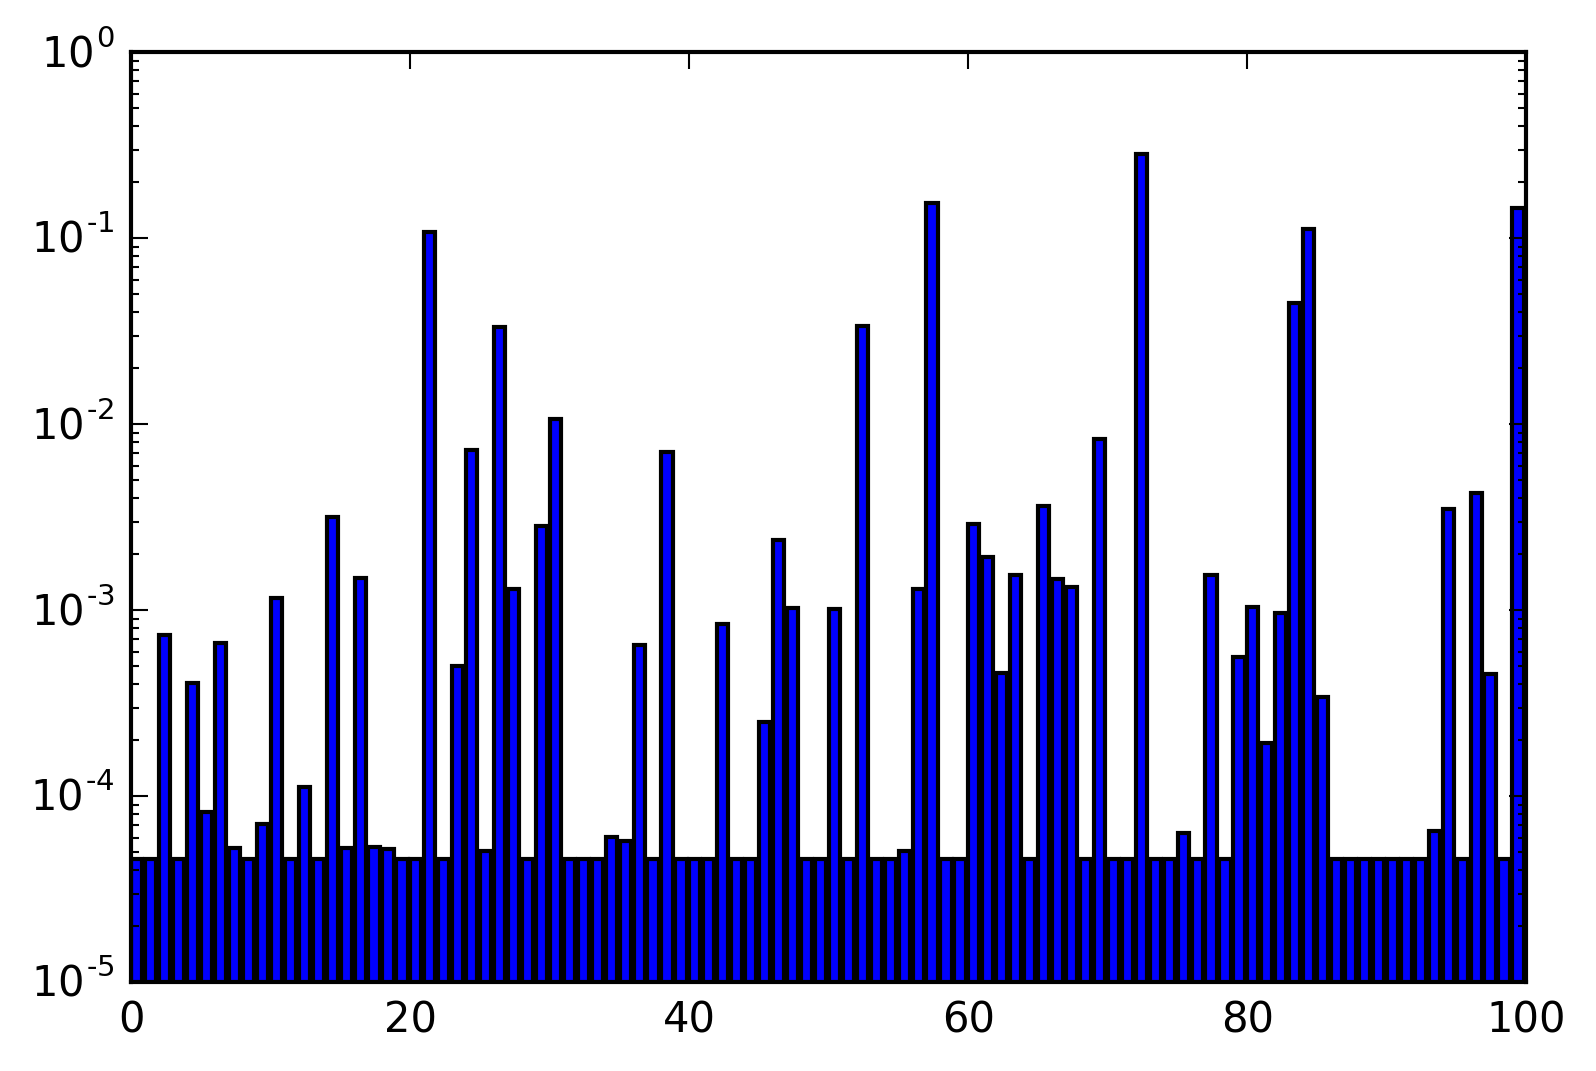

In [227]:
plt.bar(np.arange(100), bla.mean(axis=0), log=True)

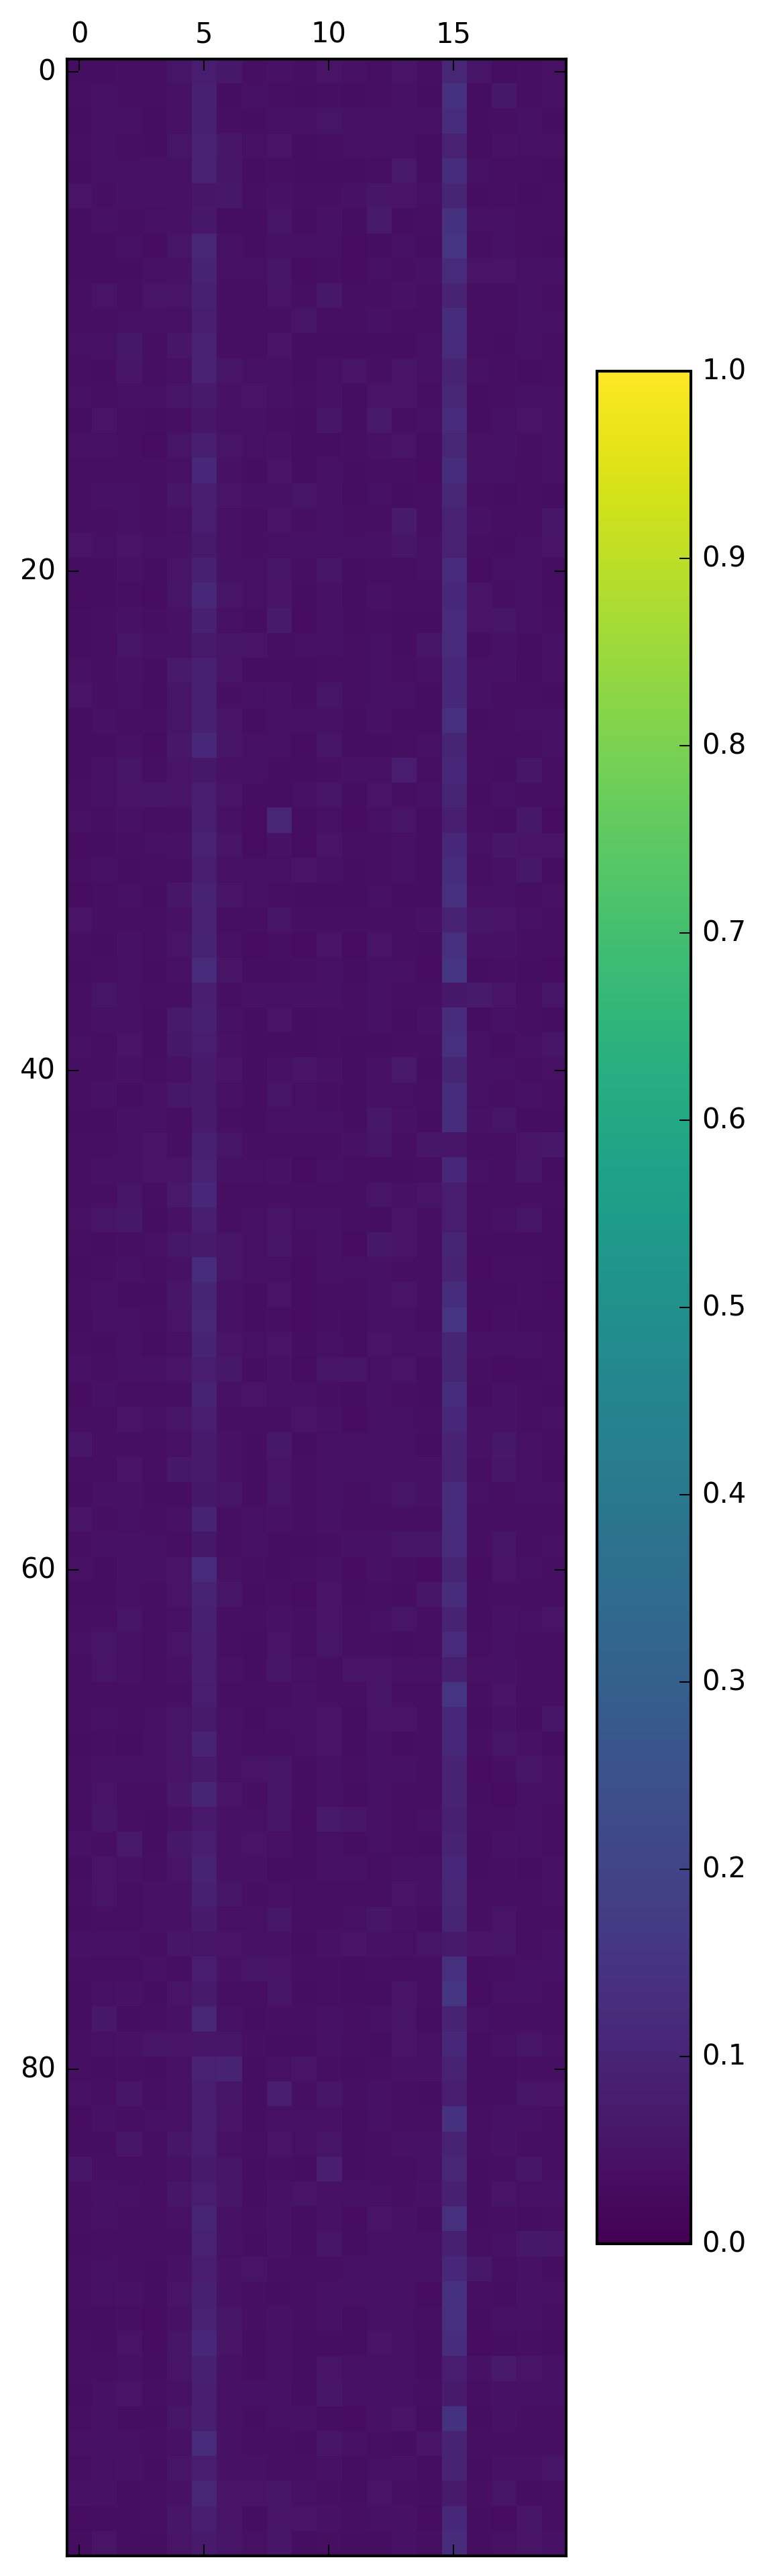

In [173]:
plt.matshow(bla[:100, :], vmin=0, vmax=1, cmap="viridis")
plt.colorbar()

### FIXME TRY LEMMA ON SMALLER DATA? Use sklearn tokenization? remove br? check vocab created by spacy. three-grams also? also tfidf lemmatization with C=100 and pipeline...

In [11]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stopwords = ENGLISH_STOP_WORDS.union({"movie", "film", "movies"})
vect = CountVectorizer(min_df=3, max_features=10000, max_df=.9, stop_words=stopwords)
X = vect.fit_transform(text_train)

In [12]:
lda = LatentDirichletAllocation(evaluate_every=5, verbose=1, n_topics=100)
lda.fit(X)

iteration: 5, perplexity: 5122.9459
iteration: 10, perplexity: 5088.0200


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=5, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_jobs=1, n_topics=100, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=1)

In [14]:
document_topics = lda.transform(X)

<Container object of 100 artists>

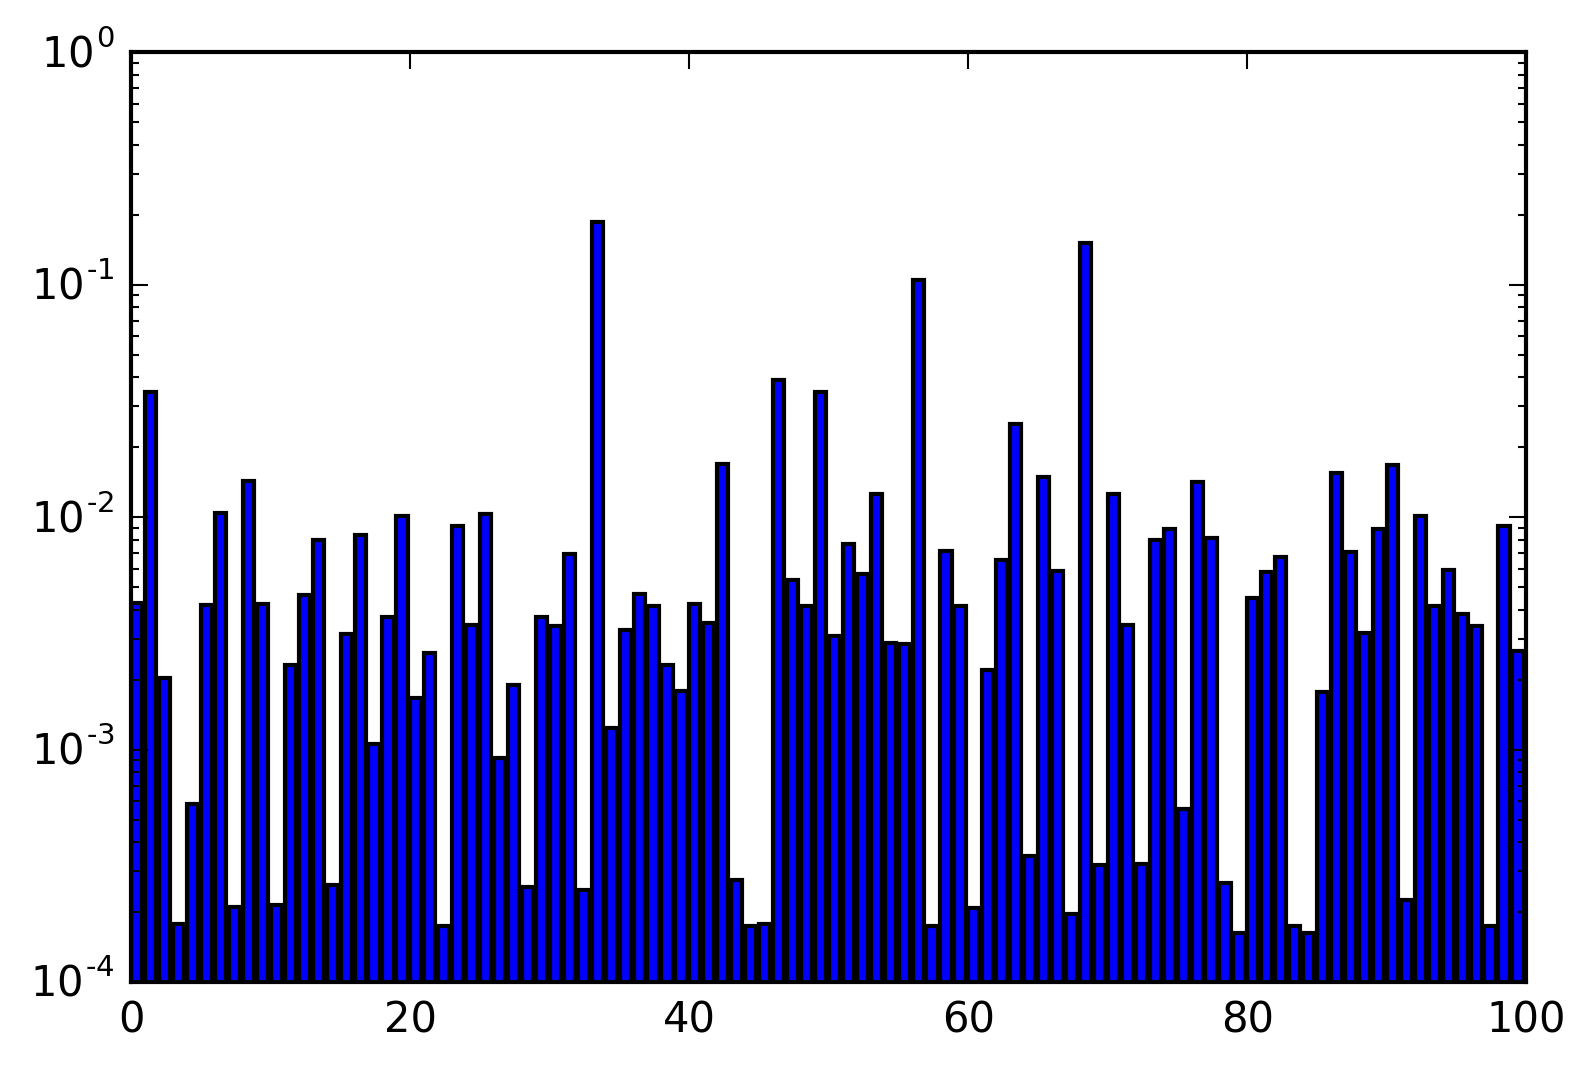

In [15]:
plt.bar(np.arange(100), document_topics.mean(axis=0), log=True)

In [19]:
feature_names = np.array(vect.get_feature_names())
inds = np.argsort(lda.components_, axis=1)
for i, ind in enumerate(inds):
    print(i)
    print(feature_names[ind[-50:]])

0
['mustache' 'release' 'redneck' 'anytime' 'drive' 'reputation' 'track'
 'group' 'pixar' '1979' 'ants' 'advertised' 'dawn' 'mason' 'feature'
 'wagner' '1988' 'option' 'gather' 'tank' 'claus' 'shoes' 'dee' 'produced'
 'germans' 'enthusiasm' 'homosexual' 'dolls' 'grinch' 'accidentally'
 'desert' 'bug' 'dinosaurs' 'gun' 'wells' 'army' '1990' 'head' 'toy'
 'train' 'von' 'wayne' 'soldiers' 'machine' 'green' 'disappointing'
 'excuse' 'christmas' 'john' 'sit']
1
['dying' 'decent' 'worth' 'apartment' 'talent' 'big' 'scene' 'just'
 'brilliant' 'didn' 'work' 'best' 'showed' 'casting' 'cast' 'end' 'ending'
 'parts' 'like' 'liked' 'ok' 'overall' 'dialog' 'actress' 'interesting'
 'script' 'plays' 'weak' 'actor' 'lot' 'apart' 'especially' 'scenes'
 'music' 'character' 'playing' 'did' 'played' 'nice' 'play' 'does' 'bit'
 'acting' 'job' 'story' 'pretty' 'little' 'really' 'great' 'good']
2
['bolivia' 'draft' 'lombard' 'competing' 'vic' 'carole' 'tested' 'welcomed'
 'toro' 'sketches' 'sykes' '1931' 'ge

In [21]:
lda_batch = LatentDirichletAllocation(evaluate_every=5, verbose=1, n_topics=100, learning_method="batch")
lda_batch.fit(X)

iteration: 5, perplexity: 5103.6717
iteration: 10, perplexity: 4164.0740


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=5, learning_decay=0.7, learning_method='batch',
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_jobs=1, n_topics=100, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=1)

In [22]:
lda_batch = LatentDirichletAllocation(evaluate_every=5, verbose=1, n_topics=100, learning_method="batch", max_iter=25)
lda_batch.fit(X)

iteration: 5, perplexity: 5059.8779
iteration: 10, perplexity: 4186.4705
iteration: 15, perplexity: 3897.6536
iteration: 20, perplexity: 3778.0472
iteration: 25, perplexity: 3720.5933


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=5, learning_decay=0.7, learning_method='batch',
             learning_offset=10.0, max_doc_update_iter=100, max_iter=25,
             mean_change_tol=0.001, n_jobs=1, n_topics=100, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=1)

In [23]:
document_topics = lda.transform(X)

<Container object of 100 artists>

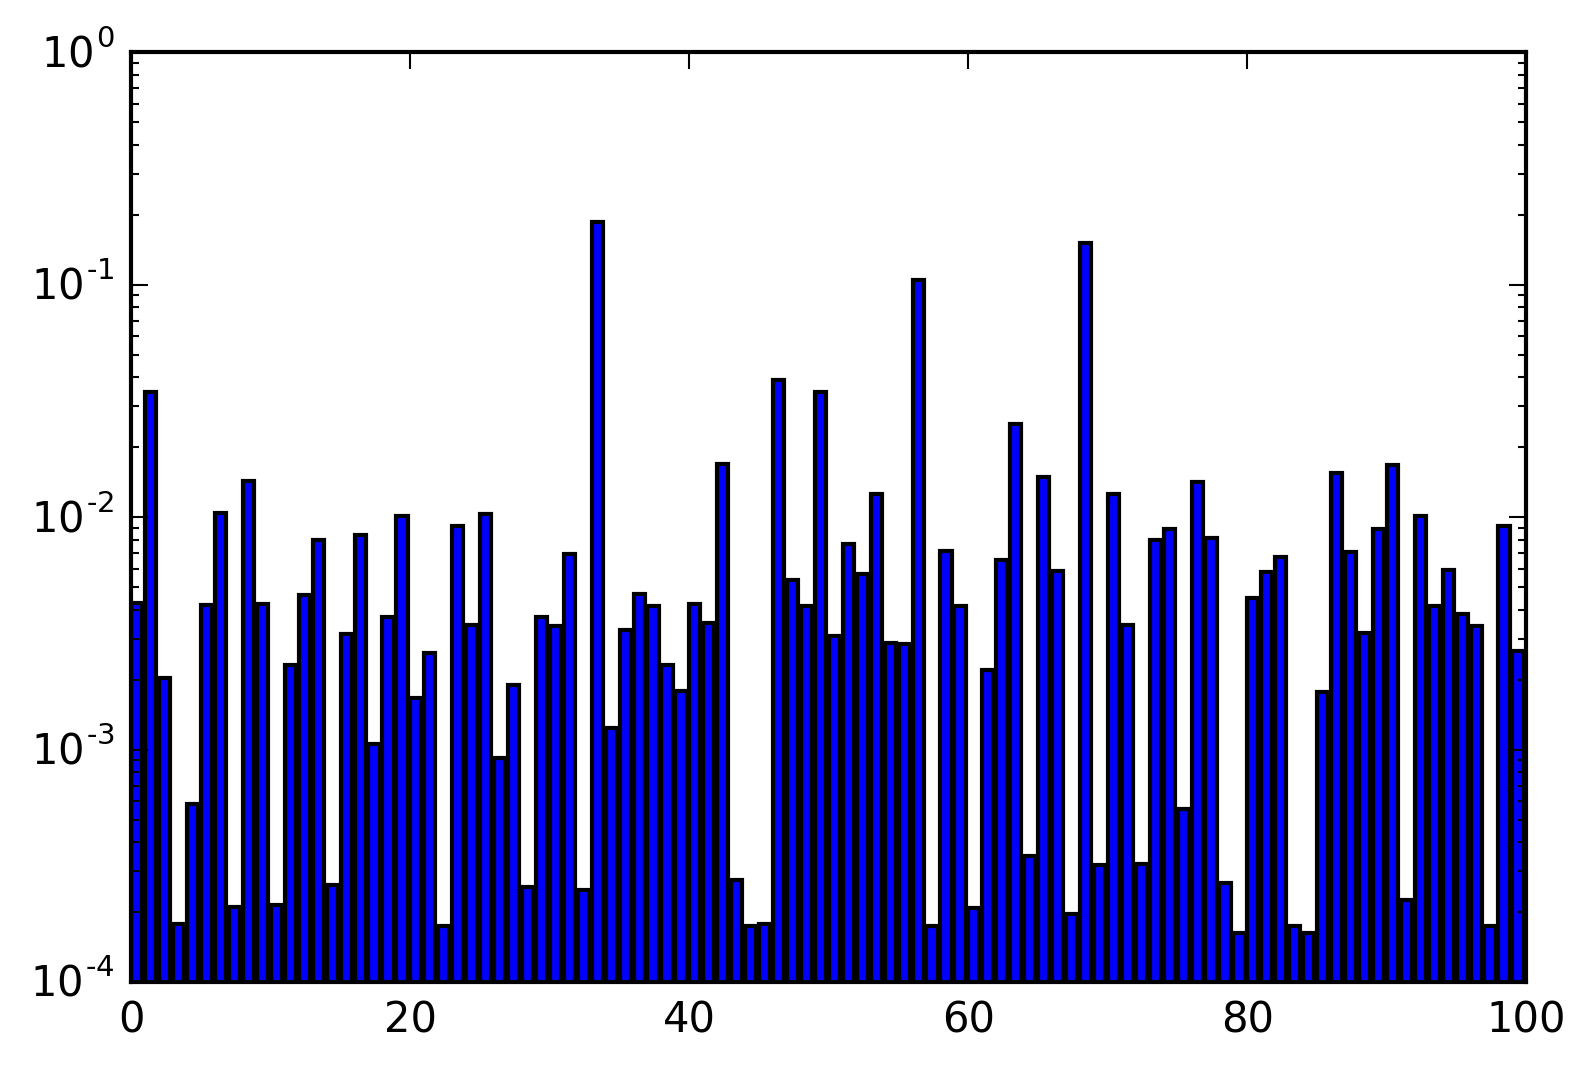

In [24]:
plt.bar(np.arange(100), document_topics.mean(axis=0), log=True)

In [25]:
feature_names = np.array(vect.get_feature_names())
inds = np.argsort(lda.components_, axis=1)
for i, ind in enumerate(inds):
    print(i)
    print(feature_names[ind[-50:]])

0
['mustache' 'release' 'redneck' 'anytime' 'drive' 'reputation' 'track'
 'group' 'pixar' '1979' 'ants' 'advertised' 'dawn' 'mason' 'feature'
 'wagner' '1988' 'option' 'gather' 'tank' 'claus' 'shoes' 'dee' 'produced'
 'germans' 'enthusiasm' 'homosexual' 'dolls' 'grinch' 'accidentally'
 'desert' 'bug' 'dinosaurs' 'gun' 'wells' 'army' '1990' 'head' 'toy'
 'train' 'von' 'wayne' 'soldiers' 'machine' 'green' 'disappointing'
 'excuse' 'christmas' 'john' 'sit']
1
['dying' 'decent' 'worth' 'apartment' 'talent' 'big' 'scene' 'just'
 'brilliant' 'didn' 'work' 'best' 'showed' 'casting' 'cast' 'end' 'ending'
 'parts' 'like' 'liked' 'ok' 'overall' 'dialog' 'actress' 'interesting'
 'script' 'plays' 'weak' 'actor' 'lot' 'apart' 'especially' 'scenes'
 'music' 'character' 'playing' 'did' 'played' 'nice' 'play' 'does' 'bit'
 'acting' 'job' 'story' 'pretty' 'little' 'really' 'great' 'good']
2
['bolivia' 'draft' 'lombard' 'competing' 'vic' 'carole' 'tested' 'welcomed'
 'toro' 'sketches' 'sykes' '1931' 'ge

In [28]:
for i in document_topics[:, 99].argsort()[-10:]:
    #print(bla[i])
    print(text_train[i])

b'The story of the untouchable who acted like a great soldier, saving the lives of hundreds if not thousands, is told in the 1939 film "Gunga Din." Based loosely on the Rudyard Kipling poem, the film is brilliantly directed by George Stevens and stars Cary Grant, Douglas Fairbanks Jr. and Victor Mclagen. The title role is played by Sam Jaffe, well known in my era as Ben Casey\'s boss, Dr. Zorba, a name that became synonymous with big, out of control hair. Say "Dr. Zorba hair" to anyone of my generation, and they know what you\'re talking about.  Set in India at the time of the British occupation, three soldiers - two romantic, dashing figures in Grant and Fairbanks, and McLagen as a big lug - are cut-ups - in reality, three overgrown boys. Gunga Din is the water carrier, treated somewhat meanly - verbally, anyway - by McChesney (McLaglen), but Cutter (Grant) is fond of him. When he catches Din (pronounced Deen) practicing being his soldier walk and salute as he apes the unit during the

In [29]:
texts_long = [text_train[i] for i in np.where(np.array(X.sum(axis=1)).ravel() > 100)[0]]

In [34]:
vect_long = CountVectorizer(min_df=3, max_features=10000, max_df=.9, stop_words=stopwords)
X_long = vect_long.fit_transform(texts_long)

In [35]:
lda_batch_long = LatentDirichletAllocation(evaluate_every=5, verbose=1, n_topics=100, learning_method="batch", max_iter=50)
lda_batch_long.fit(X_long)

iteration: 5, perplexity: 6293.5436
iteration: 10, perplexity: 5236.0211
iteration: 15, perplexity: 4763.9296
iteration: 20, perplexity: 4511.9823
iteration: 25, perplexity: 4354.9550
iteration: 30, perplexity: 4251.6613
iteration: 35, perplexity: 4176.7559
iteration: 40, perplexity: 4123.0233
iteration: 45, perplexity: 4083.1607
iteration: 50, perplexity: 4052.8094


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=5, learning_decay=0.7, learning_method='batch',
             learning_offset=10.0, max_doc_update_iter=100, max_iter=50,
             mean_change_tol=0.001, n_jobs=1, n_topics=100, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=1)

In [41]:
vect_bla = CountVectorizer(min_df=.01, max_df=.9, stop_words=stopwords)
X_bla = vect_bla.fit_transform(text_train)

In [42]:
X_bla.shape

(25000, 1552)

In [57]:
lda_bla = LatentDirichletAllocation(evaluate_every=5, verbose=1, n_topics=20, learning_method="batch", max_iter=50, random_state=0)
lda_bla.fit(X_bla)

iteration: 5, perplexity: 1003.8310
iteration: 10, perplexity: 981.9740
iteration: 15, perplexity: 974.6868
iteration: 20, perplexity: 970.6144
iteration: 25, perplexity: 968.1591
iteration: 30, perplexity: 966.5508
iteration: 35, perplexity: 965.1846
iteration: 40, perplexity: 964.3428
iteration: 45, perplexity: 963.8574
iteration: 50, perplexity: 963.3929


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=5, learning_decay=0.7, learning_method='batch',
             learning_offset=10.0, max_doc_update_iter=100, max_iter=50,
             mean_change_tol=0.001, n_jobs=1, n_topics=20, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=1)

In [58]:
feature_names = np.array(vect_bla.get_feature_names())
inds = np.argsort(lda_bla.components_, axis=1)
for i, ind in enumerate(inds):
    print(i)
    print(feature_names[ind[-50:]])

0
['time' 'hard' 'guy' 'probably' 'actually' 'does' 'silly' 'really' 'couple'
 'seriously' 'tries' 'people' 'friends' 'doesn' 'way' 'love' 'audience'
 'characters' 'scene' 'loud' 'best' 'times' 'black' 'isn' 'lines' 'amusing'
 'watch' 'comedic' 'good' 'joke' 'make' 'laughed' 'ben' 'laughing' 'humour'
 'romantic' 'funniest' 'moments' 'just' 'comic' 'comedies' 'laughs' 'like'
 'fun' 'hilarious' 'jokes' 'humor' 'laugh' 'comedy' 'funny']
1
['nice' 'worth' 'killer' 'charles' 'lady' 'brian' 'twists' 'stone' 'early'
 'young' 'bit' 'martin' 'pretty' 'highly' 'fans' 'crime' 'case' 'suspense'
 'doctor' 'dog' 'turns' 'does' 'lee' 'murders' 'plays' 'entertaining'
 'role' 'paul' 'quite' 'peter' 'detective' 'little' 'fun' 'steve'
 'christopher' 'richard' 'red' 'wife' 'dr' 'great' 'man' 'cast' 'thriller'
 'mystery' 'david' 'good' 'plot' 'john' 'murder' 'michael']
2
['body' 'plot' 'course' 'violent' 'die' 'fights' 'sequences' 'does' 'men'
 'best' 'blood' 'just' 'prison' 'rape' 'dead' 'goes' 'violence'

In [ ]:
# 0 comedy


In [ ]:
document_topics = lda_bla.transform(X_bla)


In [61]:

for i in document_topics[:, 2].argsort()[-10:]:
    #print(bla[i])
    print(text_train[i])

b'The plot:Kurt Harris (Jeff Wincott), a bitter, ex-cop goes undercover in the "Peacemakers" after his friend is killed by their leader. While there, he discovers that the woman wants to run for mayor, and will do anything to achieve this goal, even murder.The cast is good(Jeff Wincott is a good martial artist and good actor)...Brigitte Nielsen plays a sexy antagonist together another bad guy plays Matthias Hues also him good martial artist.The direction is good(the fight scenes also).The rest is OK, with Tony Burton who plays a friend of Kurt killed from Nilsen,and Cyndi Pass plays a bad girl.From producers of another action/martial arts film(Bounty Tracker with Lorenzo Lamas)a good action film.The best film of Martial Law series.'
b'Following a car accident, a mad scientist(Jason Evers) keeps the head of his fiancee(Virgina Leith)alive. He then goes on the prowl looking for the perfect body to make her whole again. Pretty lame all the way around, nothing redeeming here. Also in the c

In [64]:
vect_lemma = CountVectorizer(min_df=0.01, max_df=0.9, stop_words=stopwords)
X_lemma = vect_long.fit_transform(text_train)
lda_lemma = LatentDirichletAllocation(evaluate_every=5, verbose=1, n_topics=20, learning_method="batch", max_iter=50, random_state=0)
lda_lemma.fit(X_lemma)

iteration: 5, perplexity: 3512.6484
iteration: 10, perplexity: 3310.4209
iteration: 15, perplexity: 3245.1671
iteration: 20, perplexity: 3214.6116
iteration: 25, perplexity: 3197.6123
iteration: 30, perplexity: 3187.2633
iteration: 35, perplexity: 3180.4142
iteration: 40, perplexity: 3175.8641
iteration: 45, perplexity: 3172.4004
iteration: 50, perplexity: 3169.9840


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=5, learning_decay=0.7, learning_method='batch',
             learning_offset=10.0, max_doc_update_iter=100, max_iter=50,
             mean_change_tol=0.001, n_jobs=1, n_topics=20, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=1)

## Summary and Outlook